<a href="https://colab.research.google.com/github/sarthax-makesar/-Computational-Data-Science-in-Physics-1/blob/main/lesson_2_Binomial_%2C_Poission_and_Gaussian_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.special import comb
import scipy.stats as stats
import matplotlib.pyplot as plt
import math


In [ ]:
print("Test comb:",comb(2,1),"True: 2", comb(3,2), "True: 3",comb(10,3), "True: 120")

def prob(p=0.5, nheads=3, ntotal=10):
  pheads=np.power(p,nheads)
  ptails=np.power(1-p,ntotal-nheads)
  combos=comb(ntotal,nheads)
  return combos*ptails*pheads

print("Probablity of 3 heads in 10 draws is:", prob(nheads=3, ntotal=10))

Test comb: 2.0 True: 2 3.0 True: 3 120.0 True: 120
Probablity of 3 heads in 10 draws is: 0.1171875


A Computational Example of Binomial distribution


norm: 0.9999999999999996 expectation: 7.5000000000000036 Var: 5.625
norm: 1.000, expectation: 7.5 Var: 5.625


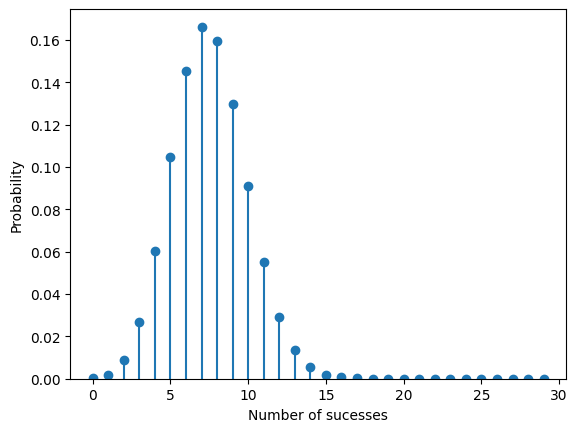

In [ ]:
n =30
p=0.25

k=np.arange(0,n)
binomial= stats.binom.pmf(k,n,p)

norm=0
exp=0
var=0
for i0 in range(n):
  norm+=stats.binom.pmf(i0,n,p)
  exp+= i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
  pVal = stats.binom.pmf(i0,n,p)
  var+= (i0-exp/norm)*(i0-exp/norm)*pVal

print("norm:",norm, "expectation:", exp/norm,"Var:", var/norm)
print("norm: 1.000, expectation:", n*p,"Var:", n*p*(1-p))

plt.plot(k,binomial,'o')
plt.vlines(k,0,binomial)
plt.ylim(bottom=0)
plt.xlabel("Number of sucesses")
plt.ylabel("Probability")
plt.show()

Probability as a Function of Coin Fairness

In order to answer this question, plot the probability of flipping a coin 10 times and observing 3 heads, for varying "coin fairness." In other words, as a function of probability  𝑝  (i.e., the probability  𝑝  of getting a heads is varying).

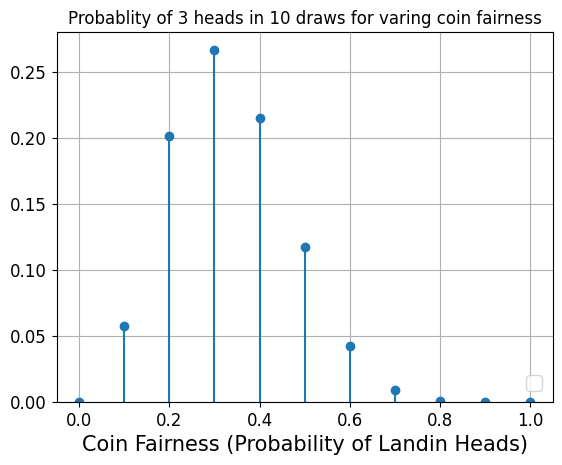

In [ ]:
def prob(p=0.5, nheads=3, ntotal=10):
  pheads=np.power(p,nheads)
  ptails=np.power(1-p,ntotal-nheads)
  combos=comb(ntotal,nheads)
  return combos*ptails*pheads

def plot_prob(x):
  ydata = prob(p=x,nheads=3,ntotal=10)
  plt.plot(x,ydata,'o')
  plt.vlines(x,0, ydata)
  plt.ylim(bottom=0)

  plt.title('Probablity of 3 heads in 10 draws for varing coin fairness',fontsize =12)

  plt.legend(loc='lower right', fontsize =15)
  plt.xlabel('Coin Fairness (Probability of Landin Heads)',fontsize=15)

  plt.xticks(fontsize =12)
  plt.yticks(fontsize=12)

  plt.grid()
  plt.show()

prob_vals = np.linspace(0,1,11)
plot_prob(prob_vals)



Rolling a Die
Now, instead of flipping a coin, consider rolling a die 10 times. If the die lands on 6, we consider the trial a success. If the die lands on anything other than 6, we consider the trial a failure. Using the formulae for expectation and variance that we previously defined, calculate the expectation and variance of the binomial distribution related to these criteria.

norm: 0.9999999841115736 expectation: 1.6599998674905239 Var: 1.3844389168675226
norm: 1.000, expectation: 1.6600000000000001 Var: 1.3844400000000001


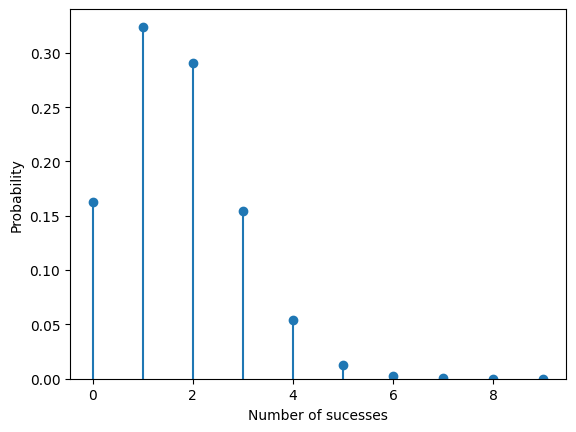

In [ ]:
n =10
p=0.166

k=np.arange(0,n)
binomial= stats.binom.pmf(k,n,p)

norm=0
exp=0
var=0
for i0 in range(n):
  norm+=stats.binom.pmf(i0,n,p)
  exp+= i0*stats.binom.pmf(i0,n,p)
for i0 in range(n):
  pVal = stats.binom.pmf(i0,n,p)
  var+= (i0-exp/norm)*(i0-exp/norm)*pVal

print("norm:",norm, "expectation:", exp/norm,"Var:", var/norm)
print("norm: 1.000, expectation:", n*p,"Var:", n*p*(1-p))

plt.plot(k,binomial,'o')
plt.vlines(k,0,binomial)
plt.ylim(bottom=0)
plt.xlabel("Number of sucesses")
plt.ylabel("Probability")
plt.show()

Applications Using theBinomial distribution

Probablity of obesrving Fast Radio Bursts 

In [ ]:
def prob(ndays=2, nobs=2, p=10/364):
  return stats.binom.pmf(nobs,ndays,p)

print("2 Observations in 2 days:",prob())
print("2 Observations in 7 days:",prob(7))
print("19 Observation in 365 days:",prob(365,19))

2 Observations in 2 days: 0.0007547397657287766
2 Observations in 7 days: 0.013788782439504977
19 Observation in 365 days: 0.0035043069011113886


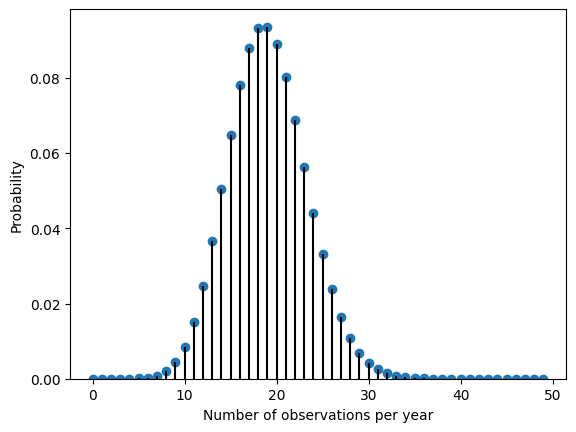

In [ ]:
p =19/365
n=365
k=np.arange(0,50)
binomial = stats.binom.pmf(k,n,p)

def plotBinomial(iX,iBinomial,label = 'binomial', color='black'):
  plt.plot(iX,iBinomial,'o')
  plt.vlines(iX,0,iBinomial,label=label, color=color)
  plt.ylim(bottom=0)
  plt.xlabel("Number of observations per year")
  plt.ylabel("Probability")

plotBinomial(k,binomial)

cdf at 19:  0.5606290918165593


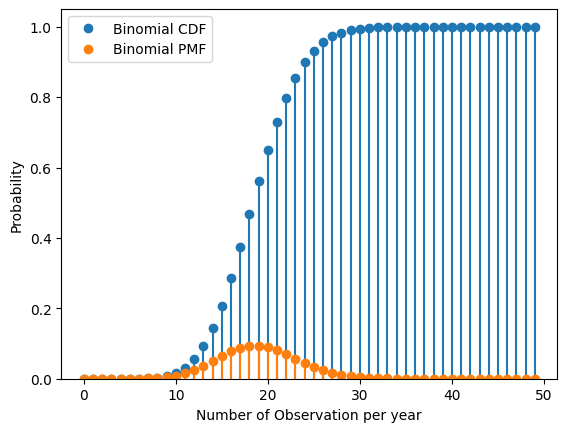

mean: 18.999999980557316 stddev: 4.243931938945087


In [ ]:
p =19/365
n =365
k = np.arange(0,50)
binomial = stats.binom.pmf(k,n,p)
binomialcdf =stats.binom.cdf(k,n,p)
print("cdf at 19: ", stats.binom.cdf(19,n,p))

plt.plot(k,binomialcdf,'o', label="Binomial CDF")
plt.vlines(k,0, binomialcdf, color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.plot(k,binomial,'o',label ="Binomial PMF")
plt.vlines(k,0,binomial,color=plt.gca().lines[-1].get_color())
plt.ylim(bottom=0)

plt.xlabel("Number of Observation per year")
plt.ylabel("Probability")
plt.legend()
plt.show()

mean = np.average(k,weights=binomial)
variance = np.average((k-mean)**2, weights=binomial)
print("mean:",mean,"stddev:",np.sqrt(variance))

Rate of Gravitational Waves Detection

In [ ]:


p= 1/7
n=7
k= np.arange(0,10)

binomial=stats.binom.pmf(k,n,p)
total1=0

for i0 in range(len(k)):
  if k[i0]>2:
    total1+=binomial[i0]
print("binomial:",total1)



binomial: 0.0652291380049372


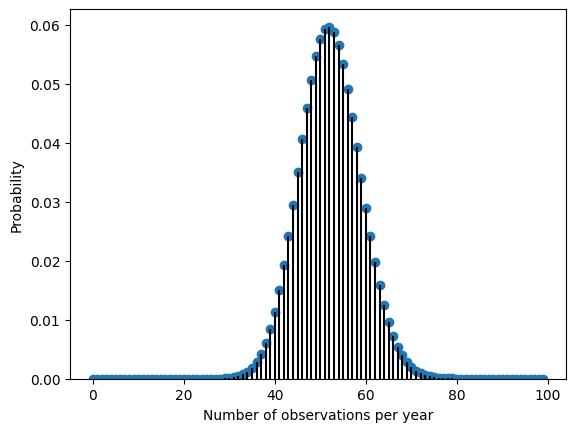

mean: 52.142857140171024 stddev: 6.685347965727346


In [ ]:
def plotBinomial(iX,iBinomial,label='Binomial',color='black'):
    plt.plot(iX,iBinomial,'o')
    plt.vlines(iX,0, iBinomial,label=label,color=color)
    plt.ylim(bottom=0)
    plt.xlabel("Number of observations per year")
    plt.ylabel("Probability")

n =365
p =1/7
k = np.arange(0,100)



binomial=stats.binom.pmf(k,n,p)

plotBinomial(k,binomial)
plt.show()

average  = np.average(k, weights=binomial)
variance = np.average((k-average)**2, weights=binomial)
print("mean:",average,"stddev:",np.sqrt(variance))

Comparison between Binomial and Poisson 

In [ ]:
def plotWeekYear(p, title=''):
  n=7
  k=np.arange(0,n+1)
  binomial_week=stats.binom.pmf(k,n,p)
  poisson_week=stats.poisson.pmf(k,n*p)
  plt.title(title)
  plotBinomial(k,binomal_week,label='Binomial',color='blue')
  plotBinomial(k,poisson_week,label='Poisson',color='orange')
  plt.legend(loc='upper right')
  plt.xlabel('number of observations per week')
  plt.show()

  n=365
  k=np.arange(0,2*p*n)
  binomial_year=stats.binom.pmf(k,n,p)
  poisson_year=stats.poisson.pmf(k,n*p)
  plt.title(title)
  plotBinomial(k,binomial_year, label='Binomial',color='blue')
  plotBinomial(k,poisson_year, label='Poisson',color='orange')
  plt.legend(loc='upper right')
  plt.show()

  average = np.average(k, weights=binomial_year)
  variance = np.average((k-average)**2,weights=binomial_year)
  print("Yearly Binomial mean:", averaage,"stddev:",np.sqrt(variance))

  average = np.average(k, weights=poisson_year)
  variance = np.average((k-average)**2, weights=poisson_year)
  print("Yearly Poisson mean:", average,"stddev:",np.sqrt(variance))
p=19/365
plotWeekYear(p, title='Probability of Observing FRBs')

p=200/365
plotWeekYear(p,title='Probability of Sunny Days in Boston')

 Calculating Error for a Poisson Distribution
For 100 bins, what is the Poisson error (standard deviation) averaged over all bins for an experiment run 100, 1000, and 10000 times?

In [ ]:
N=100
nbins=100
sample  = np.random.uniform (0,1,N)
histy, bin_edges = np.histogram(sample, bins=nbins)
yerr=np.sqrt(histy)
print(np.mean(yerr))

0.7859480682517916


The Gaussion Distribution 

Central Limit Theorem


In [ ]:
import math
def plotSum(iN):
  ntoys=10000
  sums = np.array([])
  for i0 in range(ntoys):
    pToy = np.random.uniform(0,10,iN)
    sums = np.append(sums,pToy.sum())
  _,_,binrange = normhist(sums)
  k = np.linspace(binrange[0], binrange[-1, 50])
  normal = stats.norm.pdf(k, sums.mean(), sums.std())
  plt.plot(k, normal,'o-')
  plt.xlabel("Number of successes")
  plt.ylabel("Probability")
  print("Summing:", iN, "numbers with mean:", sums.mean(),"and std-deviation",sums.std(),sums.mean()/math.sqrt(3*iN))
  plt.show()

plotSum(1)
plotSum(2)
plotSum(3)
plotSum(4)
plotSum(50)
plotSum(5000)


In [ ]:
N = 5000
unif_range = 10
print("stddev:", np.sqrt(N*unif_range**2/12))

stddev: 204.1241452319315


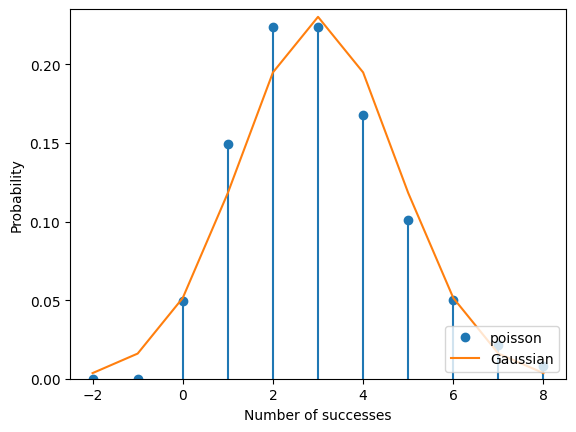

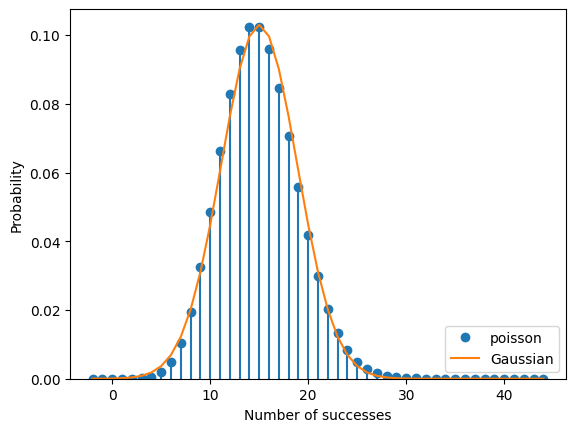

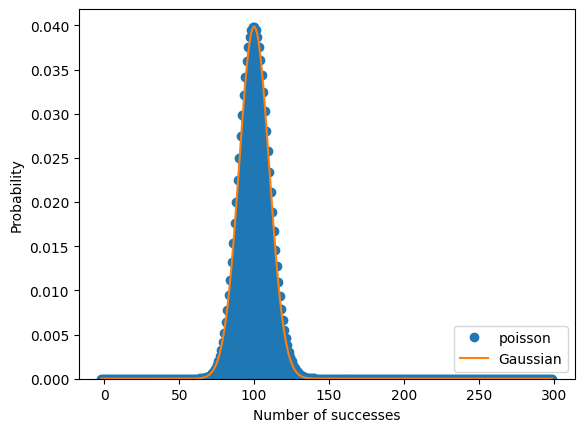

In [ ]:
def poisGausPlot(n):
    lamb = n
    k =np.arange(-2,3.0*n)
    poisson = stats.poisson.pmf(k,lamb)
    normal=stats.norm.pdf(k,n,math.sqrt(n))
    plt.plot(k,poisson,'o', label = 'poisson')
    plt.vlines(k,0,poisson, color=plt.gca().lines[-1].get_color())
    plt.ylim(bottom=0)
    plt.plot(k, normal,'-', label='Gaussian')
    plt.xlabel("Number of successes")
    plt.ylabel("Probability")
    plt.legend(loc = 'lower right')
    plt.show()

poisGausPlot(3)
poisGausPlot(15)
poisGausPlot(100)

Sum of Two Gaussians

In [ ]:
ntoys = 100000
istdev=1
sums = np.array([])
for i0 in range(ntoys):
  pToy = np.random.normal(0,istdev,2)
  sums = np.append(sums,pToy.sum())
_,_,binrange = norm.hist(sums)

k = np.arange(binrange[0],binrange[-1])
normal =stats.norm.pdf(k,sums.mean().sums.std())
plt.plot(k, normal,'o-')
plt.xlabel("Number of successe")
plt.ylabel("Probability")
print("Summing: 2, numbers with mean:", sums.mean()," and std-deviation", sums.std())
plt.show()

Uncertainties in Meansurement

In [ ]:
ntries = 1000
meas= np.full(ntries,100)
unc = np.random.normal(0,1,ntries)
meas = meas+unc

def function(ix):
    return ix**2
outmeas = function(meas)
_,_,_= normhist(outmeas)

print("Mean:", outmeas.mean(),"Stddeviation:", outmeas.std())
print("Predicted Mean:", function(100), "Stddeviation:", 2*100)


Visualize in 2D

In [ ]:
ntoys = 10000
err1 =np.array([])
err2 = np,array([])
for i0 in range(ntoys):
    pTroy = np.random.normal(0,1,2)
    err1 = np.append(pTroy[0], err1)
    err2 = np.append(pTroy[1], err2)
angle = np.linspace(0, 2,*np.pi, 150)

radius = 1*np.sqrt(2)
x = radius*np.cos(angle)
y = radius*np.sin(angle)

radius = 1*2.0
x2 = radius*np.cos(angle)
y2 = radius*np.sin(angle)
plt.rcParams['figure.figsize']= (6,6)
plt.plot(err1,err2,"p")
plt.plot(x,y,c='r')
plt.plot(x2,y2,c='r')
plt.xlabel("$\sigma_{1}$")
plt.ylabel("$\sigma_{2}$")
plt.show()
plt.rcParams['figure.figsize']= (9,6)


Propagating Uncertainties 

Analysis of Data from Tevatron collider in Fermilab

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np 
import urllib.request

def load(iName):
    label = iName
    datax = np.array([])
    datay = np.array([])
    datayerr = np.array([])
    with open(label, 'r') as csvfile:
        plots = csv.reader(csvfile, delimter=',')
        for row in plots:
            datax = np.append(datax,float(row[0]))
            datay = np.append(datay,float(row[1]))
            dataayerr=np.append(datayerr,np.sqrt(float(row[1])))

    return datax,datay,datayerr

def histratio(iydata,iyderr,iysim):
    newdata = np.array([])
    newyderr= np.array([])
    for i0 in range(len(iysim)):
        ynew= iydata[i0]/iysim[i0]
        yner= iyderr[i0]/iysim[i0]
        newydata = np.append(newydata,ynew)
        newyderr = np.append(newyderr,yner)
    return newydata,newderr

fig = plt.figure(figsize = (10.5,9.5))
ax = fig.add_subplot(2,1,1)
datax,datay,datayerr = load("data/L02/tmpdata.txt")
simx,ximy,simyerr = load("data/L02/tmpmc.txt")
plt.errorbar(datax,datay,yerr = datayerr,marker ='.',c='black',linestyle = 'None')
plt.plot(datax,simy,drawstyle='steps-mid')
ax = fig.add_subplot(2,1,2)
yrdata,yrderr = histratio(datay,datayerr,simy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker = '.',c='black',linestyle = 'None')
ax.axhline(1, c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [Gev]")
plt.ylabel("Data/Simulation")
plt.show()



In [ ]:
def shifthist(ixunc,isimy):
    newsimy = np.array([])
    for i0 in range(len(isimy)):
        ynew =isimy[i0]*(1-ixunc)
        if i0>1:
            ynew = isimy[i0-1]*ixnuc+isimy[i0]*(1-ixunc)
        newsimy=np.append(newsimy,ynew)
    return newsimy

fig =plt.figure(figsize=(10.5,9.5))
ax = fig.add_subplot(2,1,1)
newsimy = shifthist(0.5,simy)
plt.errorbar(datax,datay,yerr =datayerr,marker= '.',c ='black',linstyle='None')
plt.plot(datax, simy,drawstyle = 'steps-mid')
plt.plot(datax,newsimy,drawstyle ='steps-mid')

ax = fig.add_subplot(2,1,2)
yrdata,yrderr =histratio(datay,datyerr,newsimy)
ax.errorbar(datax,yrdata,yerr=yrderr,marker='.',c='black',linestyle='None')
ax.axhline(1,c='red')
ax.set_ylim(0.5,1.5)
plt.xlabel("Mjj [GeV]")
plt.ylabel("Data/Simulation")
plt.show()